# 📊 Boxplot of Class Ratios Across Clients
This notebook visualizes the distribution of class labels (e.g., 'good' vs 'bad') across clients using boxplots to analyze label balance before federated training.

---

In [1]:
import os
import matplotlib.pyplot as plt

def compute_class_proportions(base_dir):
    """
    Computes the proportion of 'good' and 'bad' files for each client.

    Args:
        base_dir (str): Directory containing client folders (e.g., client_1, client_2, ...)

    Returns:
        dict: {'good': [proportions], 'bad': [proportions]}
    """
    proportions = {'good': [], 'bad': []}

    for client in sorted(os.listdir(base_dir)):
        client_path = os.path.join(base_dir, client)
        if not os.path.isdir(client_path):
            continue

        good_files = 0
        bad_files = 0

        for class_dir in ['good', 'bad']:
            class_path = os.path.join(client_path, class_dir)
            if not os.path.exists(class_path):
                continue
            count = len([f for f in os.listdir(class_path) if f.endswith(".wav")])
            if class_dir == 'good':
                good_files = count
            else:
                bad_files = count

        total = good_files + bad_files
        if total > 0:
            proportions['good'].append(good_files / total)
            proportions['bad'].append(bad_files / total)

    return proportions

def plot_class_proportion_boxplot(proportions, title="Class Proportions Per Client"):
    """
    Generates a box plot from client class proportions.

    Args:
        proportions (dict): Output of `compute_class_proportions`
        title (str): Title for the plot
    """
    data = [proportions['good'], proportions['bad']]
    labels = ['Good', 'Bad']
    colors = ['green', 'red']

    fig, ax = plt.subplots(figsize=(8, 6))
    bp = ax.boxplot(data, patch_artist=True, tick_labels=labels)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_title(title)
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.grid(True)
    plt.tight_layout()
    plt.show()

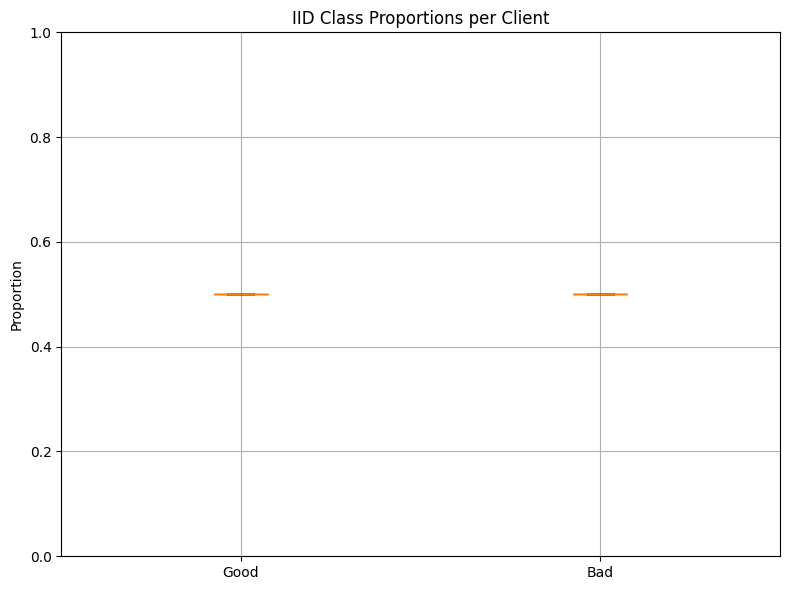

In [5]:
dir = "../../resources/material/train-data/federated/IID"  # Update if needed
proportions = compute_class_proportions(dir)
plot_class_proportion_boxplot(proportions, title="IID Class Proportions per Client")

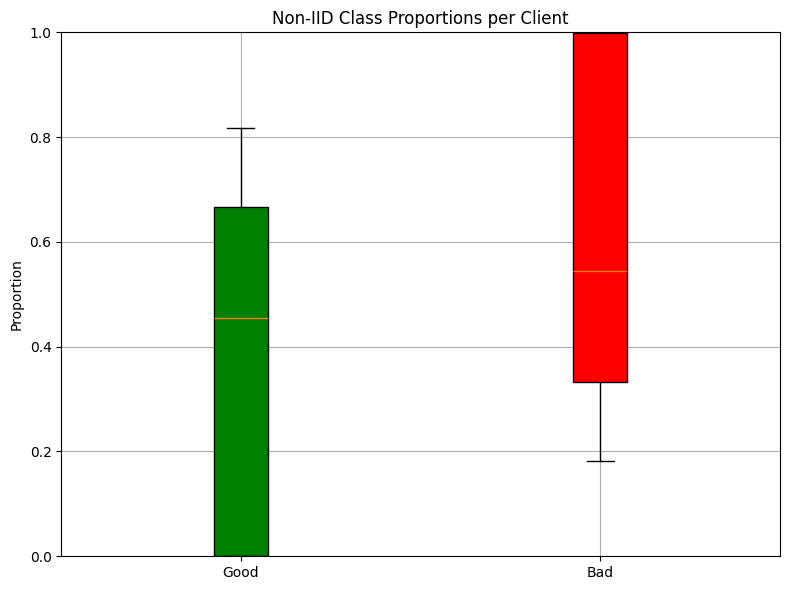

In [6]:
dir = "../../resources/material/train-data/federated/non-IID"  # Update if needed
proportions = compute_class_proportions(dir)
plot_class_proportion_boxplot(proportions, title="Non-IID Class Proportions per Client")